In [70]:
valori_x = []
for x in range(-20, 21): # in altri linguaggi di programmazione: for (int x = -20; x < 21; x+=1)
    valori_x.append(x)

valori_x

[-20,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20]

In [71]:
valori_x = [x for x in range(-20, 21)] # operazione a vettori (uguale alla cella sopra)

In [72]:
import numpy as np

array_x = np.array(valori_x)
array_retta = 3*array_x # m=3

# check:
# print(array_x)
# print(array_retta)

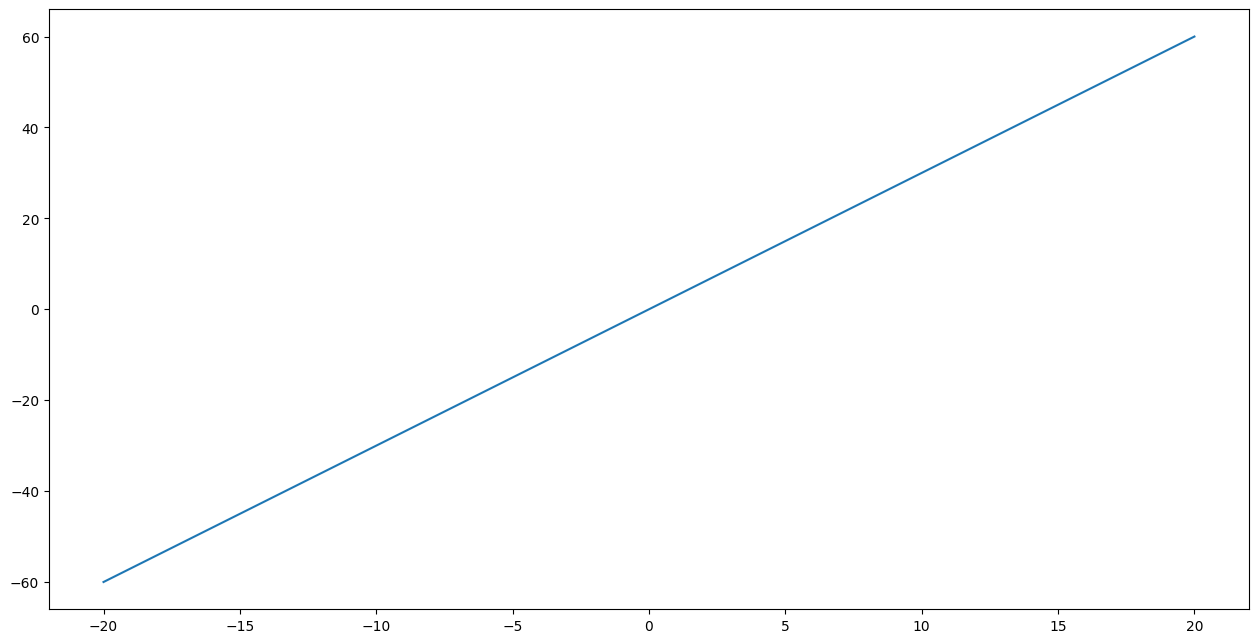

In [73]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))
ax_retta = fig.add_axes(rect=(0,0,1,1))
ax_retta.plot(array_x, array_retta)

**esercizi:**
1. modificare il codice per disegnare anche una parabola semplice (x^2)
1. aggiungere una parabola (x^2 + 2x + 6)

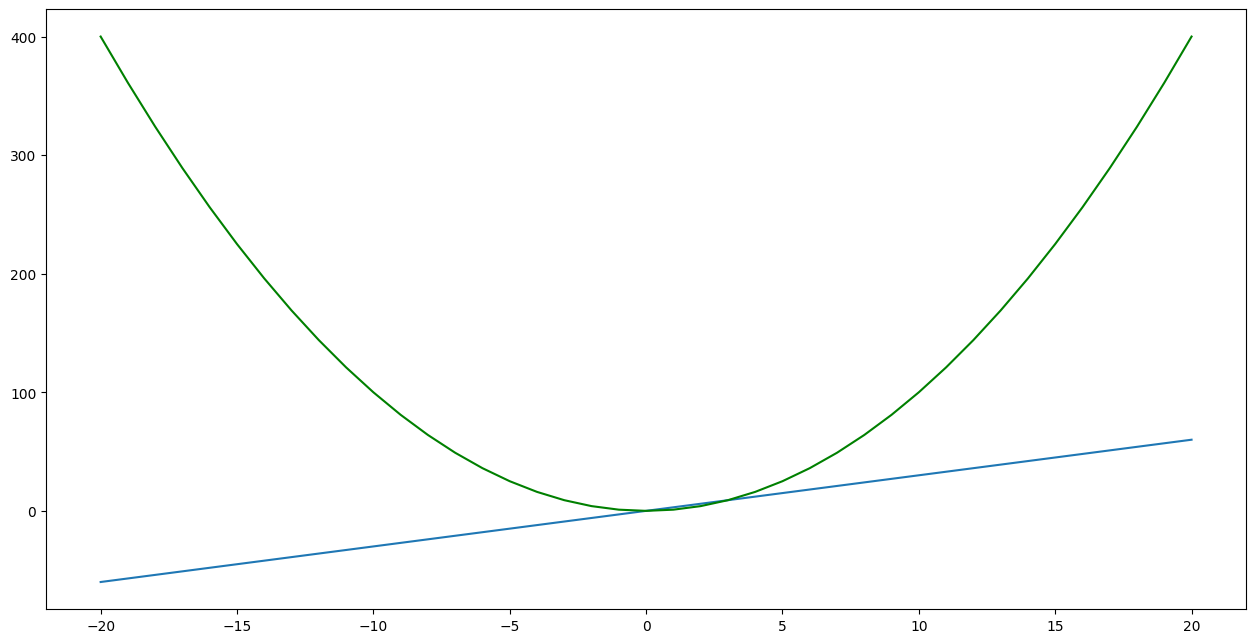

In [74]:
#1 
array_parabola = array_x**2

ax_retta.plot(array_x, array_parabola, color='green')
fig

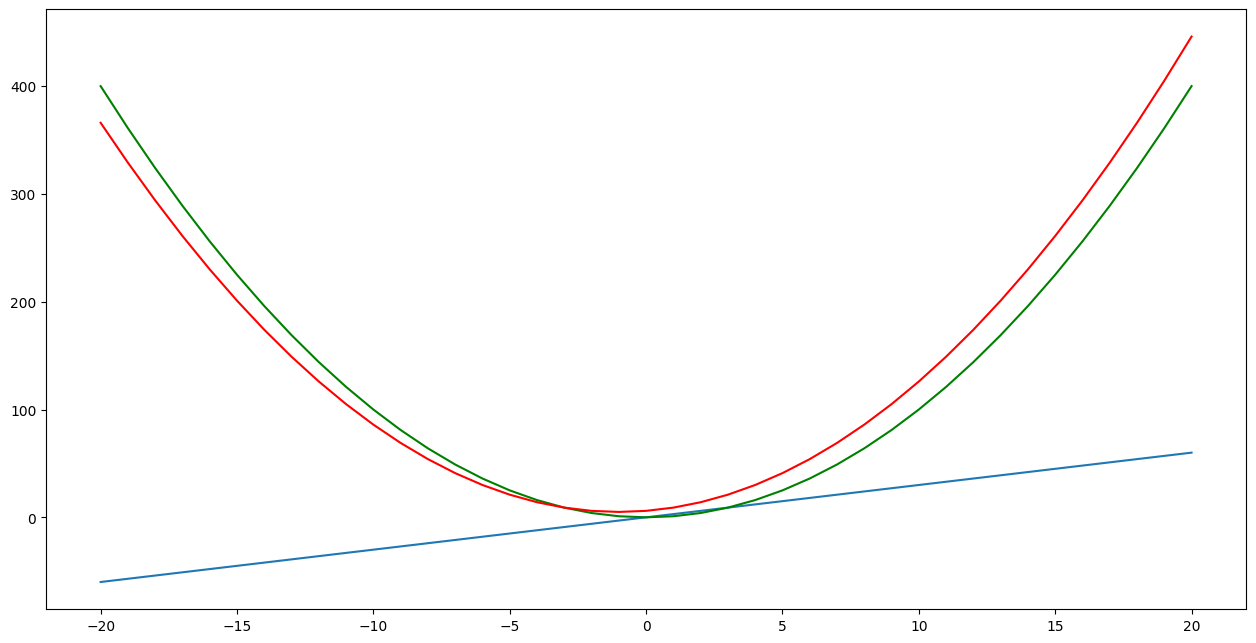

In [75]:
#2
array_parabola_2 = array_x**2 + 2*array_x +6

ax_retta.plot(array_x, array_parabola_2, color='red')
fig

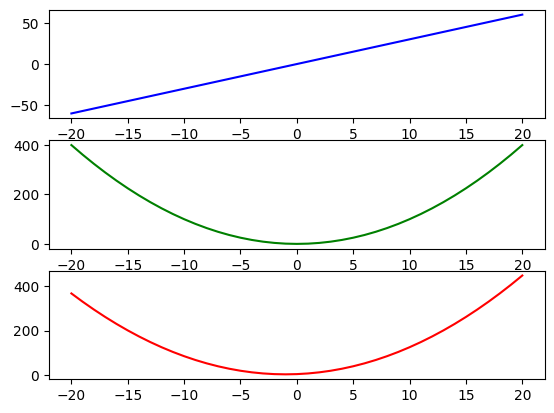

In [76]:
#alternativa per più grafici:
fig, axes = plt.subplots(nrows=3, ncols=1)
axes[0].plot(array_x, array_retta, color='blue')
axes[1].plot(array_x, array_parabola, color='green')
axes[2].plot(array_x, array_parabola_2, color='red')

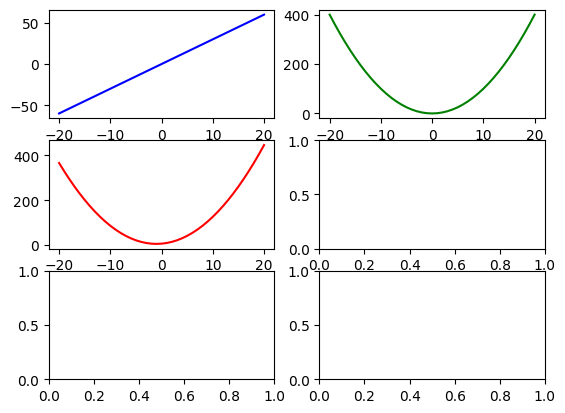

In [77]:
#stessa cosa, ma due colonne
fig, axes = plt.subplots(nrows=3, ncols=2)
axes[0,0].plot(array_x, array_retta, color='blue')
axes[0,1].plot(array_x, array_parabola, color='green')
axes[1,0].plot(array_x, array_parabola_2, color='red')

# Knight's Walk (continuato)

esempio tratto da 
https://www.youtube.com/watch?v=RGQe8waGJ4w (runtime: 6:12)

## Parte I : Initilizzazione della scacchiera

Ci servirà una matrice a 2 dimensioni. La matrice avrà dimensioni $(2n+1)*(2n+1)$, con n = numero intero (int)

La scacchiera avrà centro con coordinate (n,n).

Riempiamo l'array con numeri interi e a spirale. Ad esempio:
```python
board = initialize_board(3)
```

il risultato sarà:
```julia
7×7 Array{Int64,2}:
 37  36  35  34  33  32  31
 38  17  16  15  14  13  30
 39  18   5   4   3  12  29
 40  19   6   1   2  11  28
 41  20   7   8   9  10  27
 42  21  22  23  24  25  26
 43  44  45  46  47  48  49
```

*Note:*
- Python usa indici con base 0, il centro dell'array `board` è l'elemento `board[n,n]`, non `board[0,0]`
- Dopo aver trovato il centro, inserendo il valore 1, dobbiamo considerare esattamente $n$ "Cerchi" di raggio maggiore. Useremo un for-loop.
- In ogni cerchio, ci sono 4 segmenti (su, sinistra, giù, destra) che possiamo gestire con 4 for-loops
.

In [78]:
import numpy as np

def initialize_board(n):
    dim_board = 2*n + 1
    board = np.zeros((dim_board, dim_board), dtype=int)

    board[n,n] = 1

    i=2

    #per ogni cerchio: (for)
    for circle in range(1, n+1):
        #riempi segmento destro (for)
        for dx in range(n+circle-1, n-circle-1, -1):
            board[dx, n+circle] = i
            i += 1
        #riempi segmento superiore (for)
        for sp in range(n+circle, n-circle, -1):
            board[n-circle, sp-1] = i
            i += 1        
        #riempi segmento sinistro (for)
        for sx in range(n-circle, n+circle):
            board[sx+1, n-circle] = i
            i += 1
        #riempi segmento inferiore (for)
        for ip in range(n-circle, n+circle):
            board[n+circle, ip+1] = i
            i += 1

    return board

In [79]:
initialize_board(2)

array([[17, 16, 15, 14, 13],
       [18,  5,  4,  3, 12],
       [19,  6,  1,  2, 11],
       [20,  7,  8,  9, 10],
       [21, 22, 23, 24, 25]])

## Parte 2 - Simulare i salti

Dobbiamo simulare e creare la sequenza numerica.

Ci serve un'altra funzione che come input prenderà il nostro `board`.
Questa funzione ci restituirà la sequenza e (dopo) le coordinate x e y

Esempio di codice:
```python
board = initialize_board(2)
seq, xs, ys = simulate_walk(board)
print("Sequence = ", seq)
print("x-coordinates = ", xs)
print("y-coordinates = ", ys)
```

Risultato:
```julia
5×5 Array{Int64,2}:
 17  16  15  14  13
 18   5   4   3  12
 19   6   1   2  11
 20   7   8   9  10
 21  22  23  24  25
Sequence = [1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14]
```

*Consigli:*
- usare un array per indicare se il riquadro è stato visitato (bool)
- attenzione a non far uscire il cavallo dalla scacchiera


In [82]:
def simulate_walk(board):
    sequenza = []; coord_x = []; coord_y = []
    board_size = np.size(board, 0)
    visited = np.zeros((board_size,board_size), dtype=bool)
    center = board_size//2
    x, y = center, center

    visited[x,y] = True
    sequenza.append(board[x,y])
    coord_x.append(x)
    coord_y.append(y)

    # loop per trovare il resto della sequenza
    dead = False # se si può spostare non è morto
    while not dead:
        dead = True
        board_min = pow(board_size,2)+1 # pow(x,y) è come dire x**y

        #tuple di tuple(x,y) con le prossime posizioni già calcolate
        positions = ((x+2,y+1),(x+2,y-1),(x-2,y+1),(x-2,y-1),(x+1,y+2),(x+1,y-2),(x-1,y+2),(x-1,y-2))

        for test_x, test_y in positions:
            if 0 <= test_x < board_size \
                and 0 <= test_y < board_size \
                and not visited[test_x, test_y]:
                board_test = board[test_x, test_y]
                if board_test < board_min:
                    dead = False
                    board_min = board_test
                    x = test_x
                    y = test_y

        if not dead:
            visited[x, y] = True
            sequenza.append(board_min)
            coord_x.append(x)
            coord_y.append(y)
        
    return sequenza, coord_x, coord_y

In [83]:
board = initialize_board(2)
simulate_walk(board)

([1, 10, 3, 6, 9, 4, 7, 2, 5, 8, 11, 14],
 [2, 3, 1, 2, 3, 1, 3, 2, 1, 3, 2, 0],
 [2, 4, 3, 1, 3, 2, 1, 3, 1, 2, 4, 3])

## Parte 3 - Visualizzare i risulutati

Con matplotlib, vogliamo visualizzare i dati, ovvero il percorso fatto dal cavallo e dove si ferma.

Esempio di codice:
```python
n = 100
Board = initialize_board(n)
sequence,x_coordinates,y_coordinates = simulate_walk(Board)
# codice per plot delle coordinate
```

ultimo elemento = 2084
coordinate 5, 38


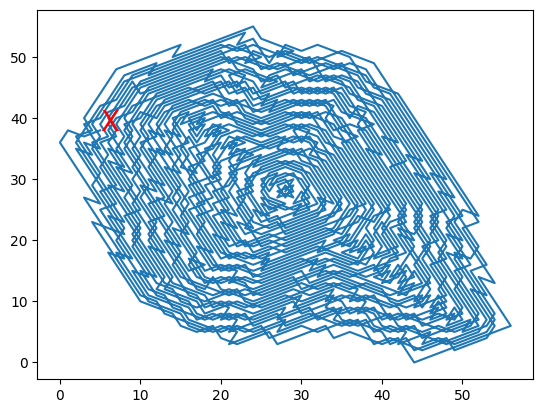

In [94]:
n = 28
Board = initialize_board(n)
sequence,x_coordinates,y_coordinates = simulate_walk(Board)
# codice per plot delle coordinate
plt.plot(x_coordinates, y_coordinates)
plt.annotate('X', xy=(x_coordinates[-1], y_coordinates[-1]), color='red', size=20)

print('ultimo elemento =', sequence[-1])
print(f'coordinate {x_coordinates[-1]}, {y_coordinates[-1]}')

# Ripasso Moduli

per installare usare `pip`: 
```shell
python -m pip install <NomeModulo>
```
da notebook:
`%pip install <NomeModulo>`

## Esempi di moduli
|Argomento|Nome|Descrizione|
|---|---|---|
|Matematica|NumPy|matematica, vettori, array|
|Scientifico|SciPy|regressione, distribuzione...|
|Data visualization|Matplotlib|Plot, grafici ecc|
|Data visualization|Seaborn|come Matplotlib ma con più funzioni avanzate|
|Data|Pandas|Data frame e funzioni per leggerfe e scrivere file, database etc|
|Database|Pyodbc|tramite ODBC, esegue query e legge da database (SQL server, mySQL...)|
|Web|Requests|chiamate API, HTML get/post...|

# Requests

Documentazione: https://requests.readthedocs.io/en/latest/

In [96]:
# %pip install requests

## Posizioni ISS

URL = 'http://api.open-notify.org/iss-now.json'

In [1]:
import requests

requests.codes.BAD #codes contiene i codici restituiti da una chiamata web

400

In [2]:
URL = 'http://api.open-notify.org/iss-now.json'
r = requests.get(URL)
r.status_code

200

In [3]:
r.json()

{'timestamp': 1702390926,
 'message': 'success',
 'iss_position': {'longitude': '-127.0912', 'latitude': '5.8262'}}

In [8]:
# esercizio: leggere 100 posizioni della ISS, mettendo il risultato in una lista. leggere una posizione ogni 3 secondi.
import time

def get_iss_data(n):
    posizioni = []

    print('Importazione in corso', end='') #end='' evita di andare a capo
    for i in range(n):
        print('.', end='')
        pos_json = requests.get(URL).json()
        posizioni.append(pos_json)
        time.sleep(3)

    print('\nImportazione completata')
    return posizioni

lista_pos = get_iss_data(100)

Importazione in corso....................................................................................................
Importazione completata


In [9]:
#dalla lista, estrarre solo lat e lon
lat = []
lon = []
for pos in lista_pos:
    lat.append(pos['iss_position']['latitude'])
    lon.append(pos['iss_position']['longitude'])

In [10]:
# %pip install plotly
# %pip install pandas
# %pip install nbformat

In [11]:
import plotly.express as px

fig = px.scatter_geo(lat=lat, lon=lon)
fig.show()

*hint on unix timestamps*

A Unix timestamp, also known as Unix time, POSIX time, or Epoch time, is a system for describing a point in time. It is the number of seconds that have elapsed since the Unix Epoch, which is the time 00:00:00 UTC on 1 January 1970, minus leap seconds. 

In the provided code, the Unix timestamp is being converted to a datetime object with the `datetime.utcfromtimestamp(timestamp)` method. This datetime object is then used to extract the year, month, day, hour, minute, and second.

In [17]:
# creare un csv con i seguenti campi:
# Lat, Lon, Year, Month, Day, Hour, Minutes, Seconds
# timestamp è un utc unix timestamp
from datetime import datetime
import calendar

with open('data/iss_list.csv', 'w') as f:
    #scrivere la testata del csv
    f.write('Lat,Lon,Year,Month,Day,Hour,Minutes,Seconds\n')

    #loop sulle righe nella lista_pos
    for riga in lista_pos:
        timestamp = riga['timestamp']
        dt = datetime.utcfromtimestamp(timestamp)

        #gestire i valori dal dizionario e scrivere ogni riga sul csv
        record = '{},{},{},{},{},{},{},{}\n'.format(
            pos['iss_position']['latitude'],
            pos['iss_position']['longitude'],
            dt.year,
            calendar.month_name[dt.month],
            dt.day,
            dt.hour,
            dt.minute,
            dt.second
        )
        f.write(record)

C:\Users\WilliamRussell\AppData\Local\Temp\ipykernel_21104\3847426440.py:14: DeprecationWarning:

datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).



In [18]:
import pandas as pd

df = pd.read_csv('data/iss_list.csv')

In [19]:
df.head()

,Lat,Lon,Year,Month,Day,Hour,Minutes,Seconds
0,32.105,-104.2372,2023,December,12,14,25,41
1,32.105,-104.2372,2023,December,12,14,25,44
2,32.105,-104.2372,2023,December,12,14,25,47
3,32.105,-104.2372,2023,December,12,14,25,51
4,32.105,-104.2372,2023,December,12,14,25,54


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lat      100 non-null    float64
 1   Lon      100 non-null    float64
 2   Year     100 non-null    int64  
 3   Month    100 non-null    object 
 4   Day      100 non-null    int64  
 5   Hour     100 non-null    int64  
 6   Minutes  100 non-null    int64  
 7   Seconds  100 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 6.4+ KB


In [21]:
#ricreo il grafico geo con il df
fig = px.scatter_geo(df, lat='Lat', lon='Lon') #con un dataframe, i dati sono in df, lat e lon fanno riferimento al nome della colonna
fig.show()